<a href="https://colab.research.google.com/github/raza-abidii/raza_projects_labs/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = "elephant"
topic2 = "rap-music"
topic3 = "rapp-musik"

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

wikipedia.set_lang('de')

de1 = wikipedia.page(topic1).content
de2 = wikipedia.page(topic3).content

In [ ]:
eng1

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but sensitive grey skin. The trunk is prehensile, bringing food and water to the mouth and grasping objects. Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging. The large ear flaps assist in maintaining a constant body temperature as well as in communication. African elephants have larger ears and concave backs, whereas Asian elephants have smaller ears and convex or level backs.\nElephants are scattered throughout sub-Saharan Africa, So

In [ ]:
eng2

'Pop music is a genre of popular music that originated in its modern form during the mid-1950s in the United States and the United Kingdom. During the 1950s and 1960s, pop music encompassed rock and roll and the youth-oriented styles it influenced. Rock and pop music remained roughly synonymous until the late 1960s, after which pop became associated with music that was more commercial, ephemeral, and accessible.\nIdentifying factors of pop music usually include repeated choruses and hooks, short to medium-length songs written in a basic format (often the verse–chorus structure), and rhythms or tempos that can be easily danced to. Much of pop music also borrows elements from other styles such as rock, hip hop, urban, dance, Latin, and country.\nThe terms popular music and pop music are often used interchangeably, although the former more accurately describes all music that is targeted for mass appeal (compare art music) and includes many disparate styles. Although much of the music that

In [ ]:
fr1

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

In [ ]:
fr2

'Le rap est un mouvement culturel et musical (musique populaire) qui tire ses origines du hip-hop. Apparu au début des années 1970 dans les ghettos américains, le rap se caractérise par une diction très rythmée et l’usage de la rime. C\'est à la base un moyen d\'expression pour revendiquer une certaine manière de vivre à cette époque, le rap prenant un caractère social important quand il souligne les injustices de la société ou un caractère plus égotrip souvent aussi. À partir des années 1980, le rap commence à s\'exporter à l\'étranger, en France, Allemagne, Royaume-Uni, Japon, Corée, Sénégal, Afrique du Sud, URSS (puis Russie) et même en Chine. Le rap se répand dans le monde entier et se propage, devenant l\'un des premiers courants artistiques avec des représentants sur chaque continent.\nLe plus souvent, un morceau de rap est une succession de couplets séparés par un refrain. Influencé par d\'autres genres musicaux (reggae, blues, jazz, rock), le rap acquiert une popularité de plus

In [ ]:
de1

'Die Elefanten (Elephantidae) sind eine Familie aus der Ordnung der Rüsseltiere. Die Familie stellt die größten gegenwärtig lebenden Landtiere und schließt außerdem die einzigen heute noch lebenden Vertreter der Ordnungsgruppe ein. Es werden drei rezente Arten unterschieden: der Afrikanische Elefant, der die weitgehend offenen Landschaften Afrikas südlich der Sahara bewohnt, der ebenfalls in Afrika heimische, aber weitgehend auf tropische Regenwälder beschränkte Waldelefant und der im südlichen und südöstlichen Asien vorkommende Asiatische Elefant, der eine Vielzahl von Landschaftsräumen nutzt. Alle Elefanten sind durch ihren Rüssel, ein muskulöses Organ, das aus der Verwachsung der Nase mit der Oberlippe hervorgegangen ist, und durch ihre aus den oberen Schneidezähnen gebildeten Stoßzähne gekennzeichnet. Weitere auffällige Merkmale finden sich in dem massiven Körperbau mit säulenförmigen Beinen und der grauen, wenig behaarten Haut.\nElefanten sind soziale Tiere, die in Familiengruppen

In [ ]:
de2

'Die Liste Hip-Hop-Musiker Deutschlands umfasst bekannte Rapper, Hip-Hop-MCs, Hip-Hop-Sänger, Hip-Hop-DJs, Beatboxer, Rap-Songwriter, Hip-Hop-Komponisten und Hip-Hop-Produzenten, die in Deutschland leben oder in Deutschland ihre Karriere gestartet haben. Es wird zwischen Solokünstlern und Gruppen unterschieden.\n\n\n== Solokünstler ==\n\n\n== Gruppen ==\n\n\n== Siehe auch ==\nListe von Hip-Hop-Musikern\n\n\n== Einzelnachweise =='

In [ ]:
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)
de1 = cleanup(de1)
de2 = cleanup(de2)

In [ ]:
de1

'dieelefantenelephantidaesindeinefamilieausderordnungderrsseltierediefamiliestelltdiegrtengegenwrtiglebendenlandtiereundschlietauerdemdieeinzigenheutenochlebendenvertreterderordnungsgruppeeineswerdendreirezenteartenunterschiedenderafrikanischeelefantderdieweitgehendoffenenlandschaftenafrikassdlichdersaharabewohntderebenfallsinafrikaheimischeaberweitgehendauftropischeregenwlderbeschrnktewaldelefantundderimsdlichenundsdstlichenasienvorkommendeasiatischeelefantdereinevielzahlvonlandschaftsrumennutztalleelefantensinddurchihrenrsseleinmuskulsesorgandasausderverwachsungdernasemitderoberlippehervorgegangenistunddurchihreausdenoberenschneidezhnengebildetenstozhnegekennzeichnetweitereaufflligemerkmalefindensichindemmassivenkrperbaumitsulenfrmigenbeinenunddergrauenwenigbehaartenhautelefantensindsozialetieredieinfamiliengruppenausweiblichenindividuenundderennachwuchslebensiedurchstreifenmehroderwenigergroeaktionsrumeaufdersuchenachnahrungdiegrederaktionsrumeunddieausdehnungderwanderungsbewegungen

In [ ]:
fr1

'leslphantssontdesmammifresproboscidiensdelafamilledeslphantidsilscorrespondentaujourdhuitroisespcesrpartiesendeuxgenresdistinctsllphantdesavanedafriqueetllphantdefortdafriqueautrefoisregroupssouslammeespcedlphantdafriqueappartiennentaugenreloxodontatandisquellphantdasieanciennementappellphantindienappartientaugenreelephasilssediffrencientparcertainescaractristiquesanatomiquesleslphantsdasietantengnralpluspetitsavecdesoreillespluspetitesouencoreunediffrenceduboutdelatrompecesespcessurvivantesfontlocalementlobjetdeprogrammesoudeprojetsderintroductionetdeprotectionlemotfranaislphantvientdumotlatinelephantusquitiresonoriginedugrecelphasivoireoulphantllphantapparaitdansdenombreusesculturesilestsymboledesagessedanslacultureasiatiqueconnupoursammoireetsonintelligencequiestcomparecelledesctacsethominidsaristoteavaitditquellphantestlabtequidpassetouteslesautresparlintelligenceetlespritdescriptionllphantdafriquequipeutatteindresepttonnesestleplusgrosanimalterrestreactuelmaisilestloinderrirelaba

In [ ]:
eng1

'elephantsarethelargestlivinglandanimalsthreelivingspeciesarecurrentlyrecognisedtheafricanbushelephantloxodontaafricanatheafricanforestelephantlcyclotisandtheasianelephantelephasmaximustheyaretheonlysurvivingmembersofthefamilyelephantidaeandtheorderproboscideaextinctrelativesincludemammothsandmastodonsdistinctivefeaturesofelephantsincludealongprobosciscalledatrunktuskslargeearflapspillarlikelegsandtoughbutsensitivegreyskinthetrunkisprehensilebringingfoodandwatertothemouthandgraspingobjectstuskswhicharederivedfromtheincisorteethservebothasweaponsandastoolsformovingobjectsanddiggingthelargeearflapsassistinmaintainingaconstantbodytemperatureaswellasincommunicationafricanelephantshavelargerearsandconcavebackswhereasasianelephantshavesmallerearsandconvexorlevelbackselephantsarescatteredthroughoutsubsaharanafricasouthasiaandsoutheastasiaandarefoundindifferenthabitatsincludingsavannahsforestsdesertsandmarshestheyareherbivorousandtheystaynearwaterwhenitisaccessibletheyareconsideredtobekeystone

In [ ]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]

In [ ]:
def plothistogram(ngram):
  keys = list(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  keys = key2string(keys)

  keys = [k[0] if isinstance(k, tuple) and len(k) == 1 else k for k in keys]
  plt.bar(keys, values)

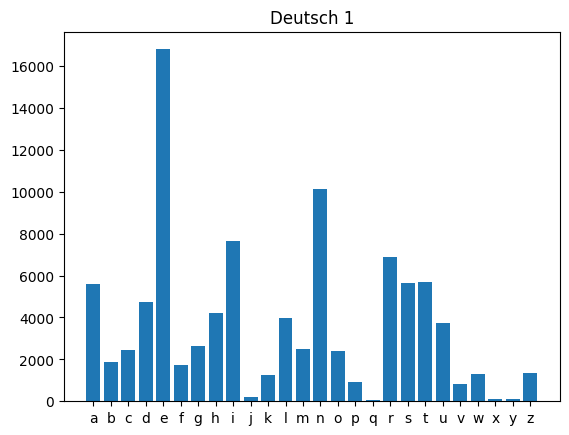

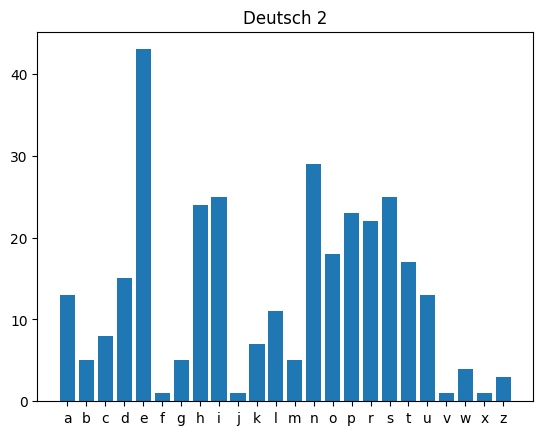

In [ ]:
unigram_de1 = Counter(ngrams(de1,1))
plothistogram(unigram_de1)
plt.title('Deutsch 1')
plt.show()

unigram_de2 = Counter(ngrams(de2,1))
plothistogram(unigram_de2)
plt.title('Deutsch 2')
plt.show()

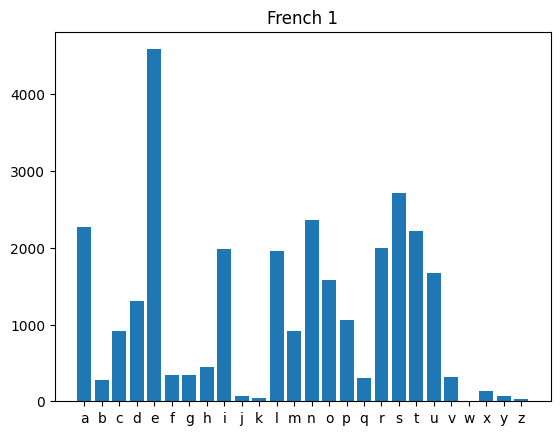

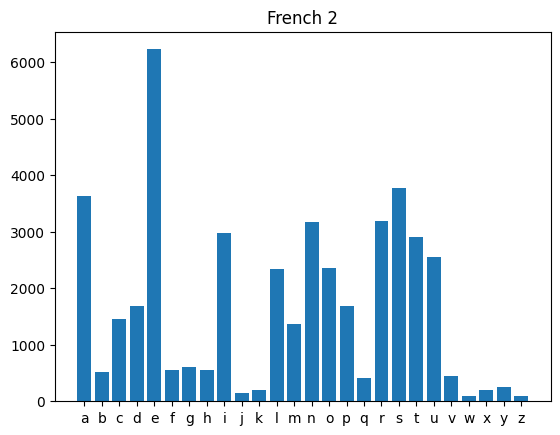

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()

unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

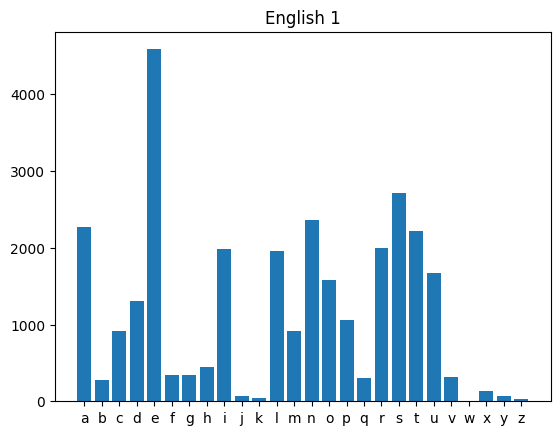

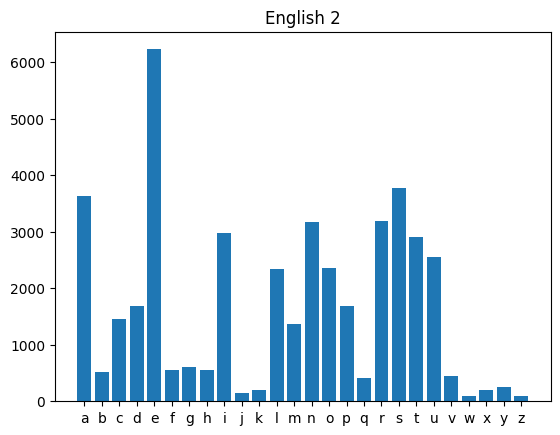

In [ ]:
unigram_en1 = Counter(ngrams(eng1,1))
plothistogram(unigram_fr1)
plt.title('English 1')
plt.show()

unigram_en2 = Counter(ngrams(eng2,1))
plothistogram(unigram_fr2)
plt.title('English 2')
plt.show()

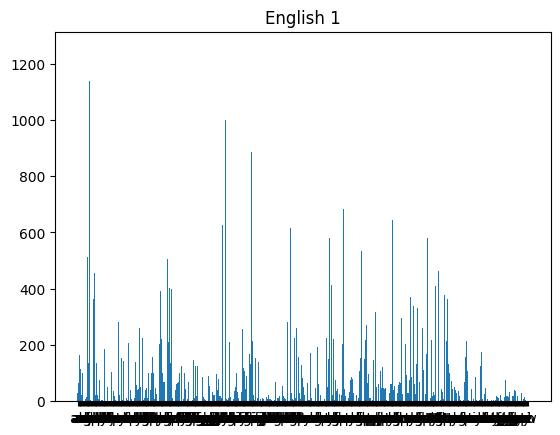

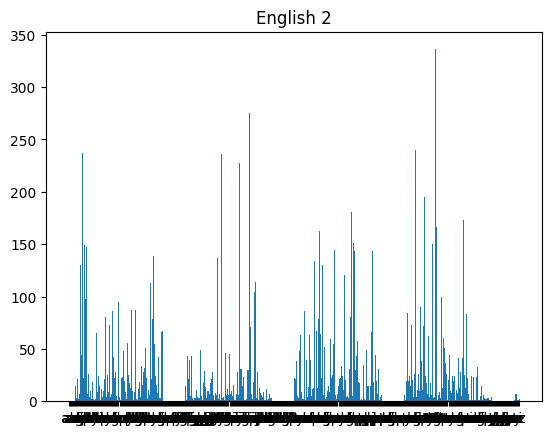

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2))
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

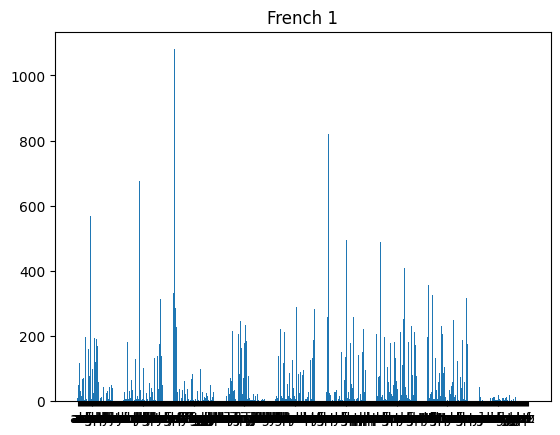

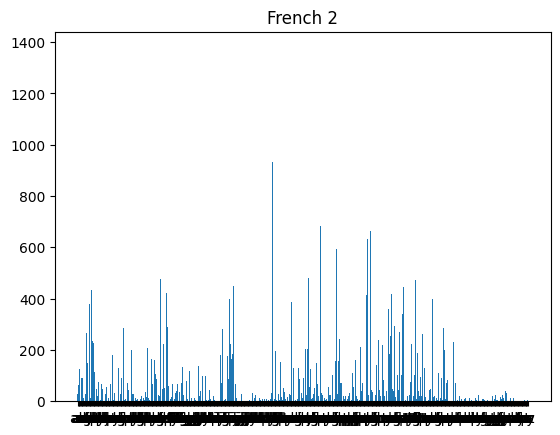

In [ ]:
bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_fr1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

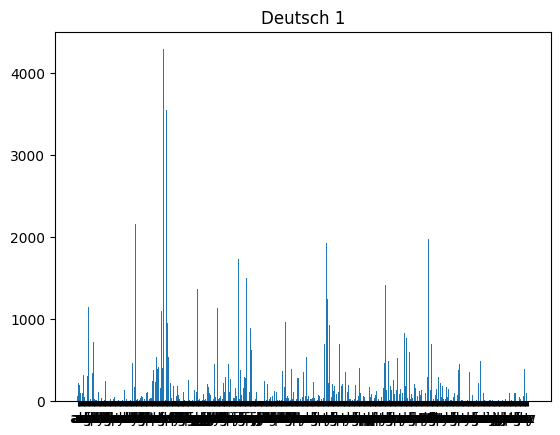

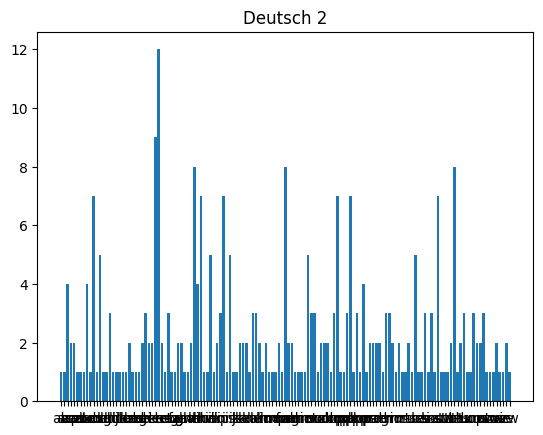

In [ ]:
bigram_de1 = Counter(ngrams(de1,2))
plothistogram(bigram_de1)
plt.title('Deutsch 1')
plt.show()

bigram_de2 = Counter(ngrams(de2,2))
plothistogram(bigram_de2)
plt.title('Deutsch 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      if (chr(ord('a')+ii), chr(ord('a')+jj)) in ngram:
        freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
      else:
        freq[ii,jj] = 0
  plt.imshow(freq, cmap = 'jet')
  return freq

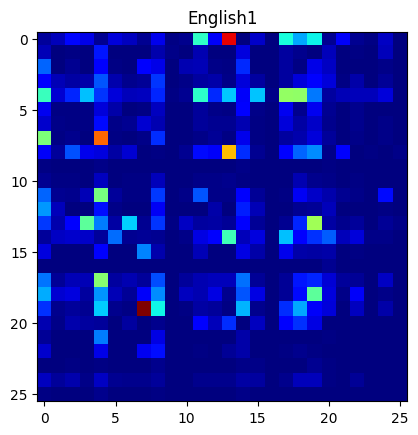

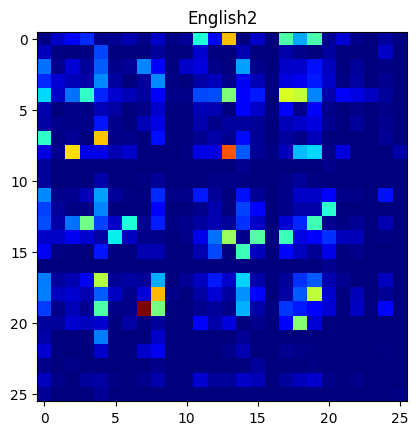

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.title('English1')
plt.show()
bieng2 = plotbihistogram(bigram_eng2)
plt.title('English2')
plt.show()

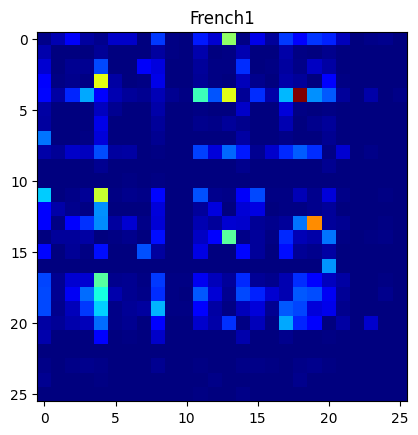

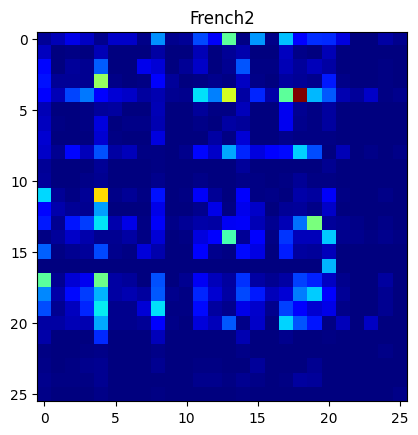

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.title('French1')
plt.show()
bifr2 = plotbihistogram(bigram_fr2)
plt.title('French2')
plt.show()

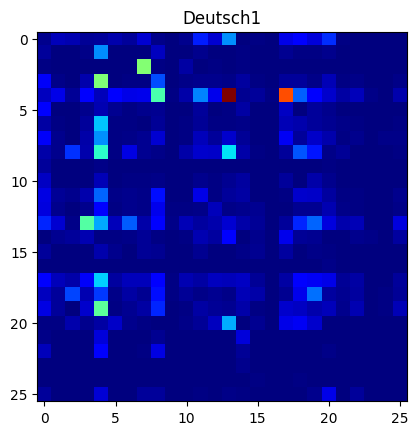

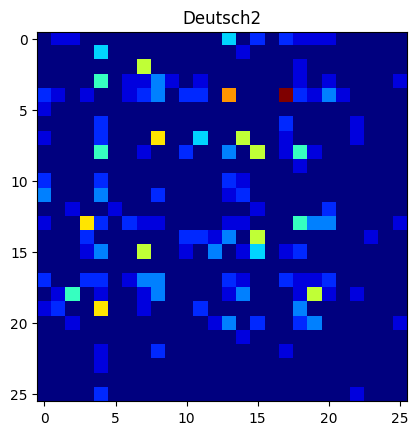

In [ ]:
bide1 = plotbihistogram(bigram_de1)
plt.title('Deutsch1')
plt.show()
bide2 = plotbihistogram(bigram_de2)
plt.title('Deutsch2')
plt.show()

top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)


English 1:
('t', 'h') : 1251.0
('a', 'n') : 1138.0
('h', 'e') : 998.0
('i', 'n') : 886.0
('n', 't') : 683.0
('e', 'r') : 662.0
('e', 's') : 657.0
('r', 'e') : 645.0
('h', 'a') : 628.0
('l', 'e') : 616.0

English 2:
('t', 'h') : 336.0
('i', 'n') : 275.0
('s', 'i') : 240.0
('a', 'n') : 237.0
('h', 'e') : 236.0
('i', 'c') : 227.0
('e', 'r') : 206.0
('e', 's') : 197.0
('s', 't') : 195.0
('r', 'e') : 191.0


In [ ]:
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


French 1:
('e', 's') : 1080.0
('n', 't') : 820.0
('d', 'e') : 676.0
('e', 'n') : 672.0
('l', 'e') : 639.0
('a', 'n') : 567.0
('o', 'n') : 495.0
('r', 'e') : 490.0
('e', 'l') : 456.0
('s', 'e') : 409.0

French 2:
('e', 's') : 1372.0
('l', 'e') : 932.0
('e', 'n') : 834.0
('d', 'e') : 732.0
('n', 't') : 683.0
('r', 'e') : 664.0
('a', 'n') : 637.0
('e', 'r') : 633.0
('r', 'a') : 632.0
('o', 'n') : 595.0


In [ ]:
print('\nDeutsch 1:')
ShowTopN(bide1)
print('\nDeutsch 2:')
ShowTopN(bide2)


Deutsch 1:
('e', 'n') : 4292.0
('e', 'r') : 3547.0
('c', 'h') : 2188.0
('d', 'e') : 2166.0
('t', 'e') : 1984.0
('n', 'd') : 1933.0
('e', 'i') : 1892.0
('i', 'e') : 1739.0
('i', 'n') : 1508.0
('r', 'e') : 1413.0

Deutsch 2:
('e', 'r') : 12.0
('e', 'n') : 9.0
('t', 'e') : 8.0
('n', 'd') : 8.0
('h', 'i') : 8.0
('o', 'p') : 7.0
('p', 'h') : 7.0
('s', 't') : 7.0
('i', 'p') : 7.0
('h', 'o') : 7.0


## Trigram

In [ ]:
def plothistogram_trigram(ngram):
  keys = list(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  keys = key2string(keys)

  plt.figure(figsize=(10, 5))
  plt.bar(keys, values)
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

In [ ]:
trigram_eng1 = Counter(ngrams(eng1, 3))
trigram_eng2 = Counter(ngrams(eng2, 3))

trigram_fr1 = Counter(ngrams(fr1, 3))
trigram_fr2 = Counter(ngrams(fr2, 3))

trigram_de1 = Counter(ngrams(de1, 3))
trigram_de2 = Counter(ngrams(de2, 3))


In [ ]:
def ShowTopN_trigram(trifreq, n=10):
  sorted_trigrams = sorted(trifreq.items(), key=lambda item: item[1], reverse=True)
  for i in range(min(n, len(sorted_trigrams))):
      trigram, freq = sorted_trigrams[i]
      print(f'{"".join(trigram)} : {freq}')

In [ ]:
print('English 1:')
ShowTopN_trigram(trigram_eng1)
print('\nEnglish 2:')
ShowTopN_trigram(trigram_eng2)

English 1:
the : 846
and : 378
han : 339
ant : 321
ele : 314
ing : 301
pha : 298
lep : 292
eph : 290
nts : 215

English 2:
the : 218
sic : 136
usi : 134
mus : 131
and : 127
pop : 122
ing : 90
opm : 65
ion : 62
pmu : 60


In [ ]:
print('French 1:')
ShowTopN_trigram(trigram_fr1)
print('\nFrench 2:')
ShowTopN_trigram(trigram_fr2)

French 1:
ent : 330
ant : 312
les : 282
pha : 212
han : 206
lph : 195
des : 188
que : 176
ede : 175
ont : 142

French 2:
ent : 357
rap : 300
les : 290
que : 286
des : 273
est : 200
era : 189
par : 186
ion : 181
iqu : 164


In [ ]:
print('Deutsch 1:')
ShowTopN_trigram(trigram_de1)
print('\nDeutsch 2:')
ShowTopN_trigram(trigram_de2)

Deutsch 1:
der : 997
sch : 807
nde : 758
che : 742
ten : 724
ein : 715
ich : 699
ere : 696
die : 686
end : 612

Deutsch 2:
hip : 7
iph : 7
pho : 7
hop : 7
sch : 5
chl : 4
ist : 3
ste : 3
opm : 3
deu : 3


English 1 Trigram Histogram:


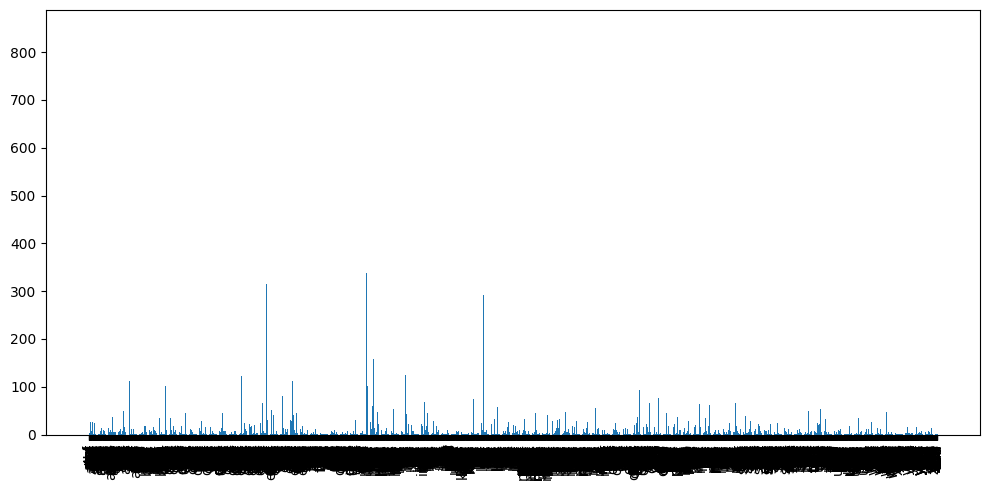

English 2 Trigram Histogram:


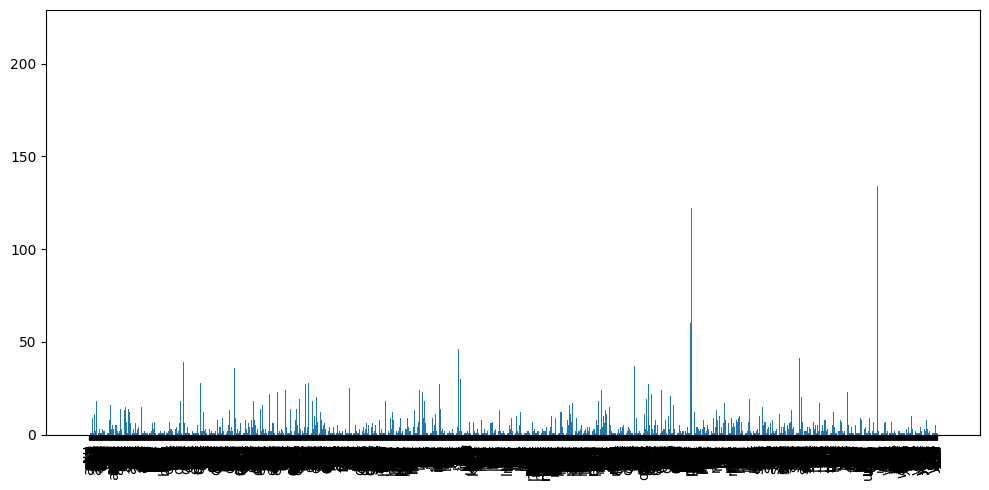

In [ ]:
print('English 1 Trigram Histogram:')
plothistogram_trigram(trigram_eng1)

print('English 2 Trigram Histogram:')
plothistogram_trigram(trigram_eng2)

French 1 Trigram Histogram:


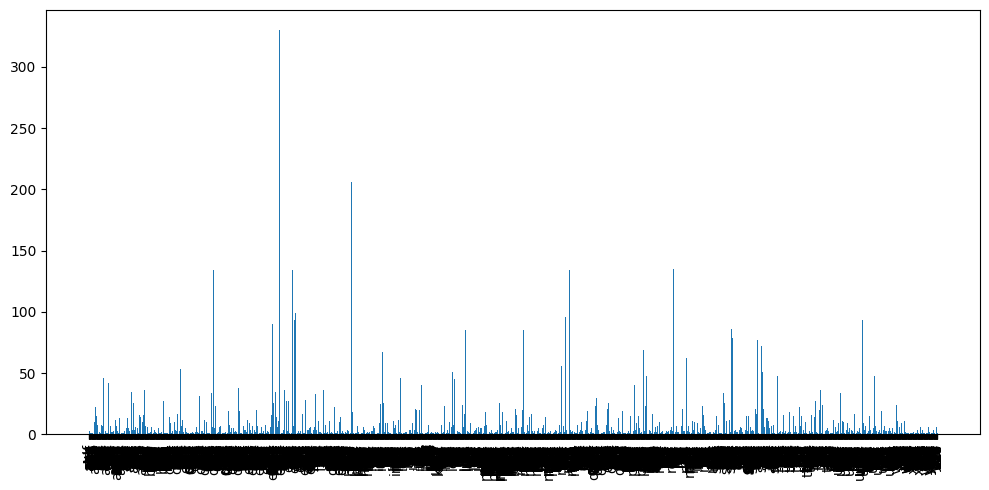

French 2 Trigram Histogram:


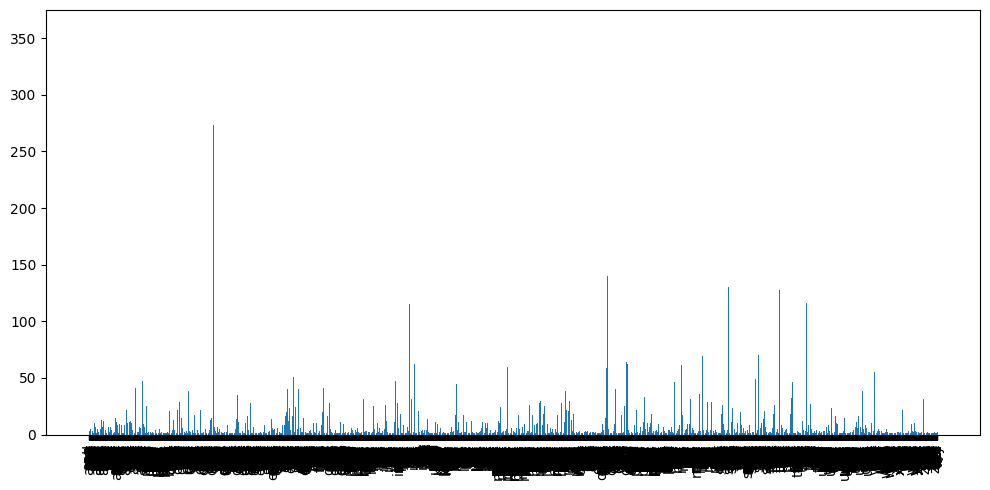

In [ ]:
print('French 1 Trigram Histogram:')
plothistogram_trigram(trigram_fr1)

print('French 2 Trigram Histogram:')
plothistogram_trigram(trigram_fr2)

Deutsch 1 Trigram Histogram:


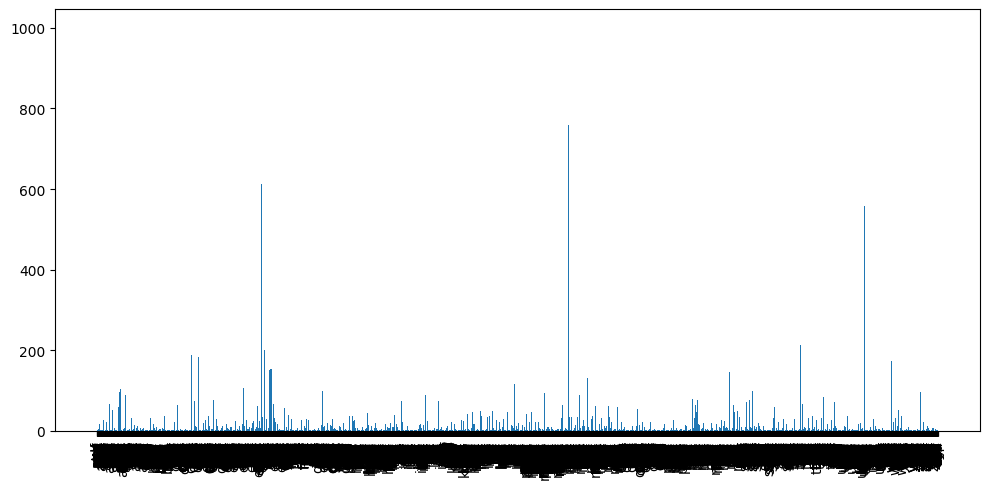

Deutsch 2 Trigram Histogram:


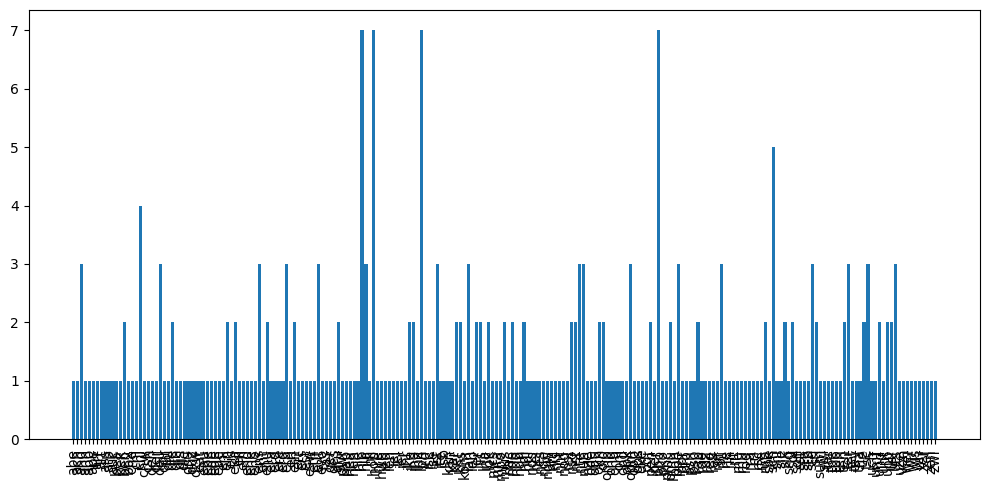

In [ ]:
print('Deutsch 1 Trigram Histogram:')
plothistogram_trigram(trigram_de1)

print('Deutsch 2 Trigram Histogram:')
plothistogram_trigram(trigram_de2)

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
no1 = train_X[train_y==2,:,:]
no0 = train_X[train_y==3,:,:]
no2 = train_X[train_y==4,:,:]
no3 = train_X[train_y==5,:,:]

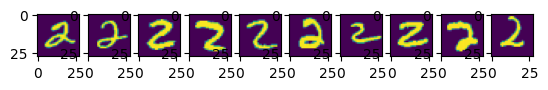

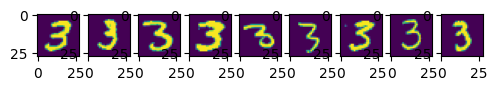

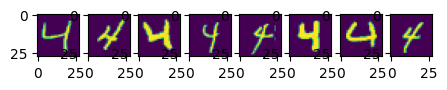

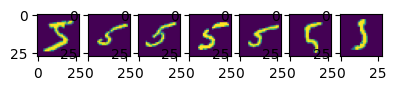

In [ ]:
for ii in range(10):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()

for ii in range(9):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

for ii in range(8):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()

for ii in range(7):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no3[ii,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2))
sum0 = np.sum(no0>0, (1,2))
sum2 = np.sum(no2>0, (1,2))
sum3 = np.sum(no3>0, (1,2))

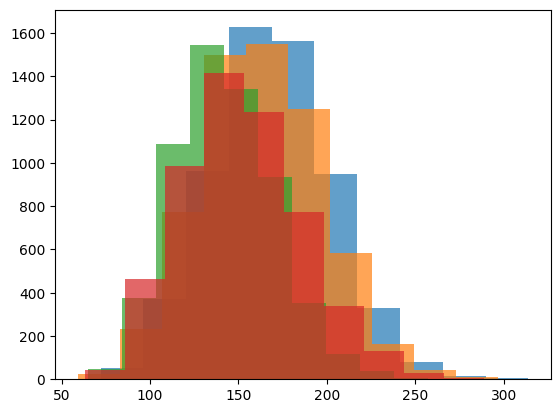

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum2, alpha=0.7);
plt.hist(sum3, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[0]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2 > 0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  im5 = np.rot90(cumArray(np.rot90(img, 4)), 4)
  im6 = np.rot90(cumArray(np.rot90(img, 5)), 5)
  im7 = np.rot90(cumArray(np.rot90(img, 6)), 6)
  im8 = np.rot90(cumArray(np.rot90(img, 7)), 7)
  hull = im1 & im2 & im3 & im4 & im5 & im6 & im7 & im8
  hole = hull & ~(img > 0)
  return hole

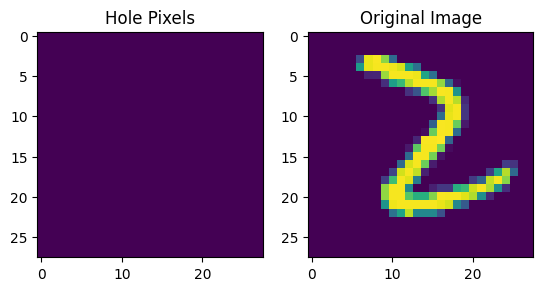

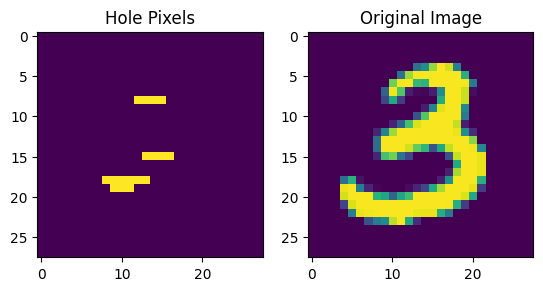

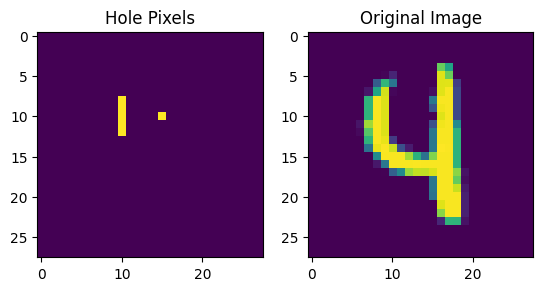

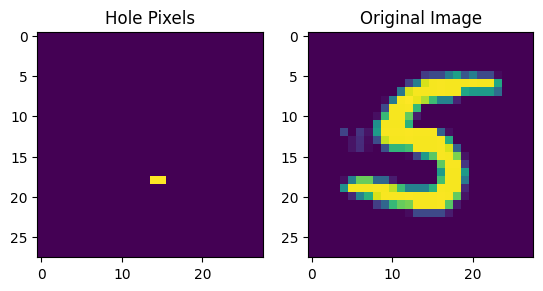

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:], no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.title("Hole Pixels")
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title("Original Image")
  plt.show()

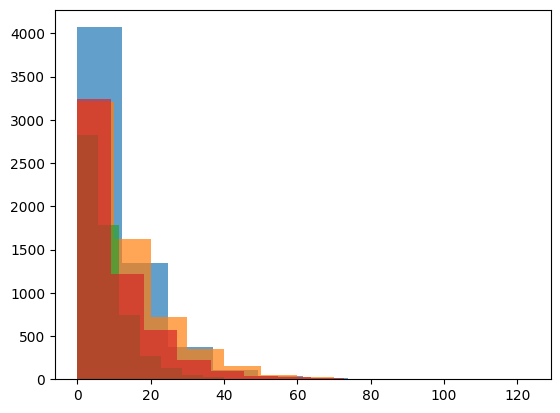

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(hole2, alpha=0.7);
plt.hist(hole3, alpha=0.7);

In [ ]:
def getSolidPixels(img):
  img2 = img.copy() > 0
  im1 = cumArray(img2)
  im2 = np.rot90(cumArray(np.rot90(img2)), 3)
  im3 = np.rot90(cumArray(np.rot90(img2, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img2, 3)), 1)
  img5 = np.rot90(cumArray(np.rot90(img2, 4)), 3)
  img6 = np.rot90(cumArray(np.rot90(img2, 5)), 4)
  img7 = np.rot90(cumArray(np.rot90(img2, 6)), 5)
  img8 = np.rot90(cumArray(np.rot90(img2, 7)), 6)
  solid = im1 & im2 & im3 & im4 & img5 & img6 & img7 & img8
  return solid

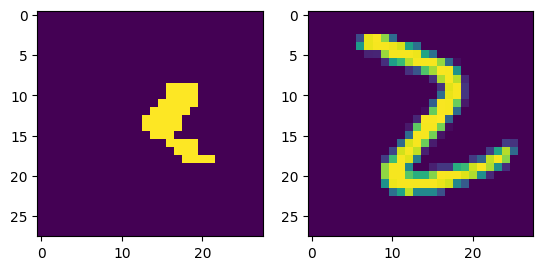

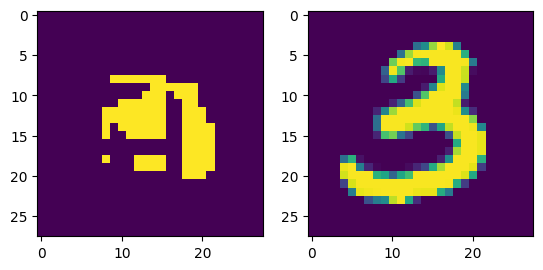

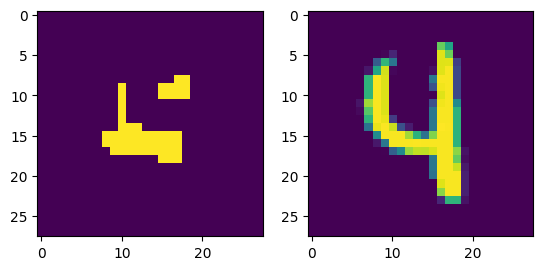

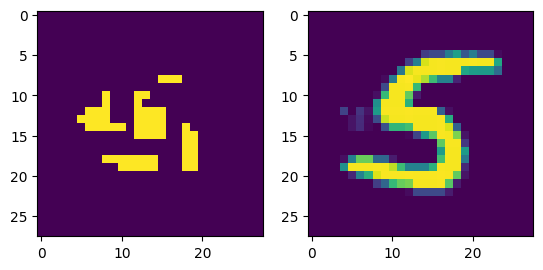

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:], no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getSolidPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

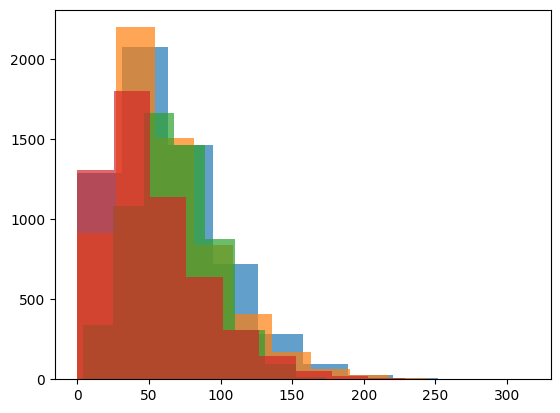

In [ ]:
solid1 = np.array([getSolidPixels(i).sum() for i in no1])
solid0 = np.array([getSolidPixels(i).sum() for i in no0])
solid2 = np.array([getSolidPixels(i).sum() for i in no2])
solid3 = np.array([getSolidPixels(i).sum() for i in no3])

plt.hist(solid1, alpha=0.7);
plt.hist(solid0, alpha=0.7);
plt.hist(solid2, alpha=0.7);
plt.hist(solid3, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

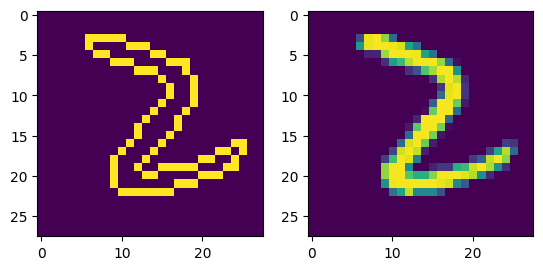

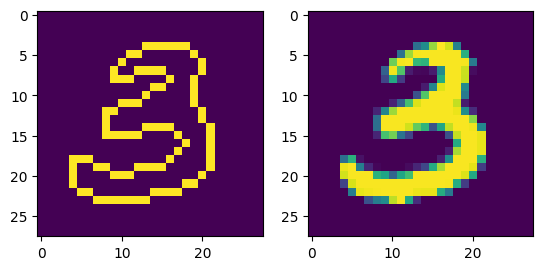

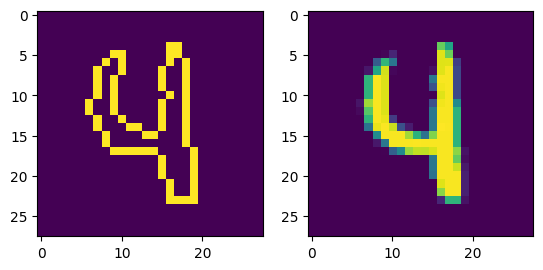

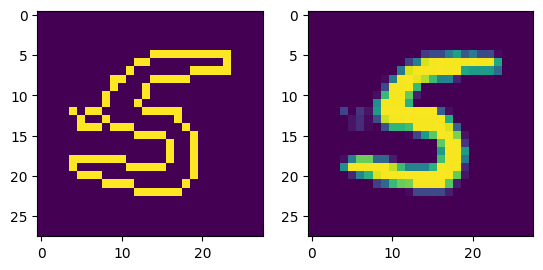

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:], no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

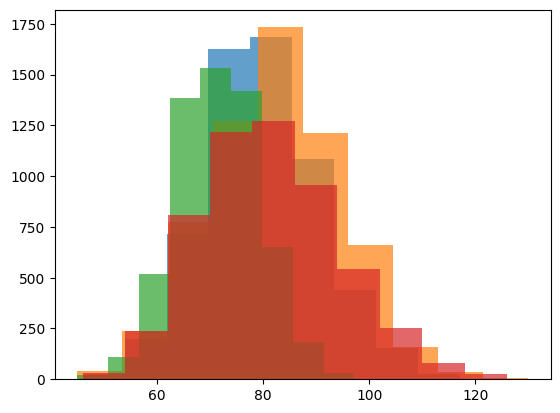

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(bound2, alpha=0.7);
plt.hist(bound3, alpha=0.7);

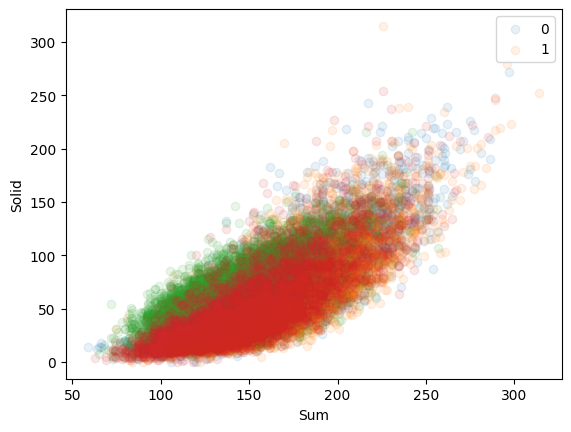

In [ ]:
plt.scatter(sum0, solid0, alpha=0.1)
plt.scatter(sum1, solid1, alpha=0.1)
plt.scatter(sum2, solid2, alpha=0.1)
plt.scatter(sum3, solid3, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Solid')
plt.legend(['0','1'])
plt.show()

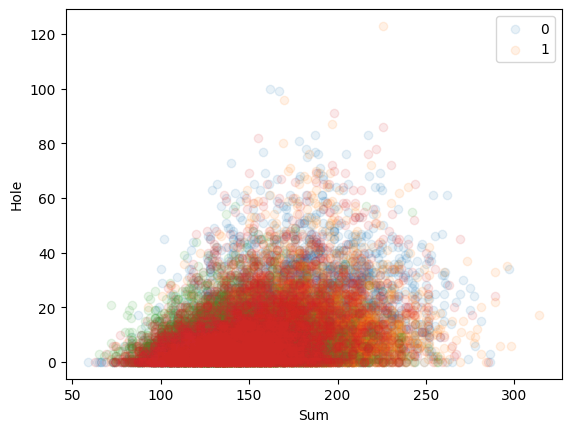

In [ ]:
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.scatter(sum2, hole2, alpha=0.1)
plt.scatter(sum3, hole3, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

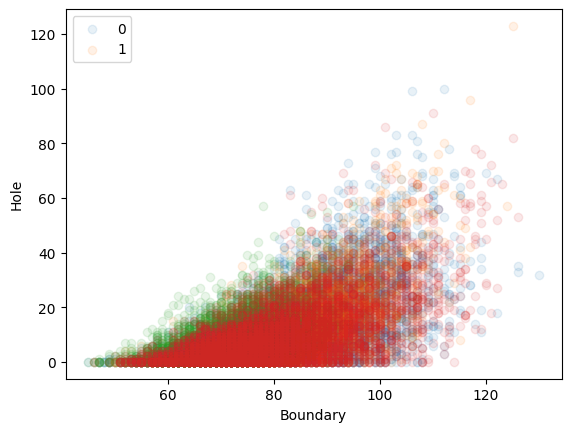

In [ ]:
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.scatter(bound2, hole2, alpha=0.1)
plt.scatter(bound3, hole3, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()